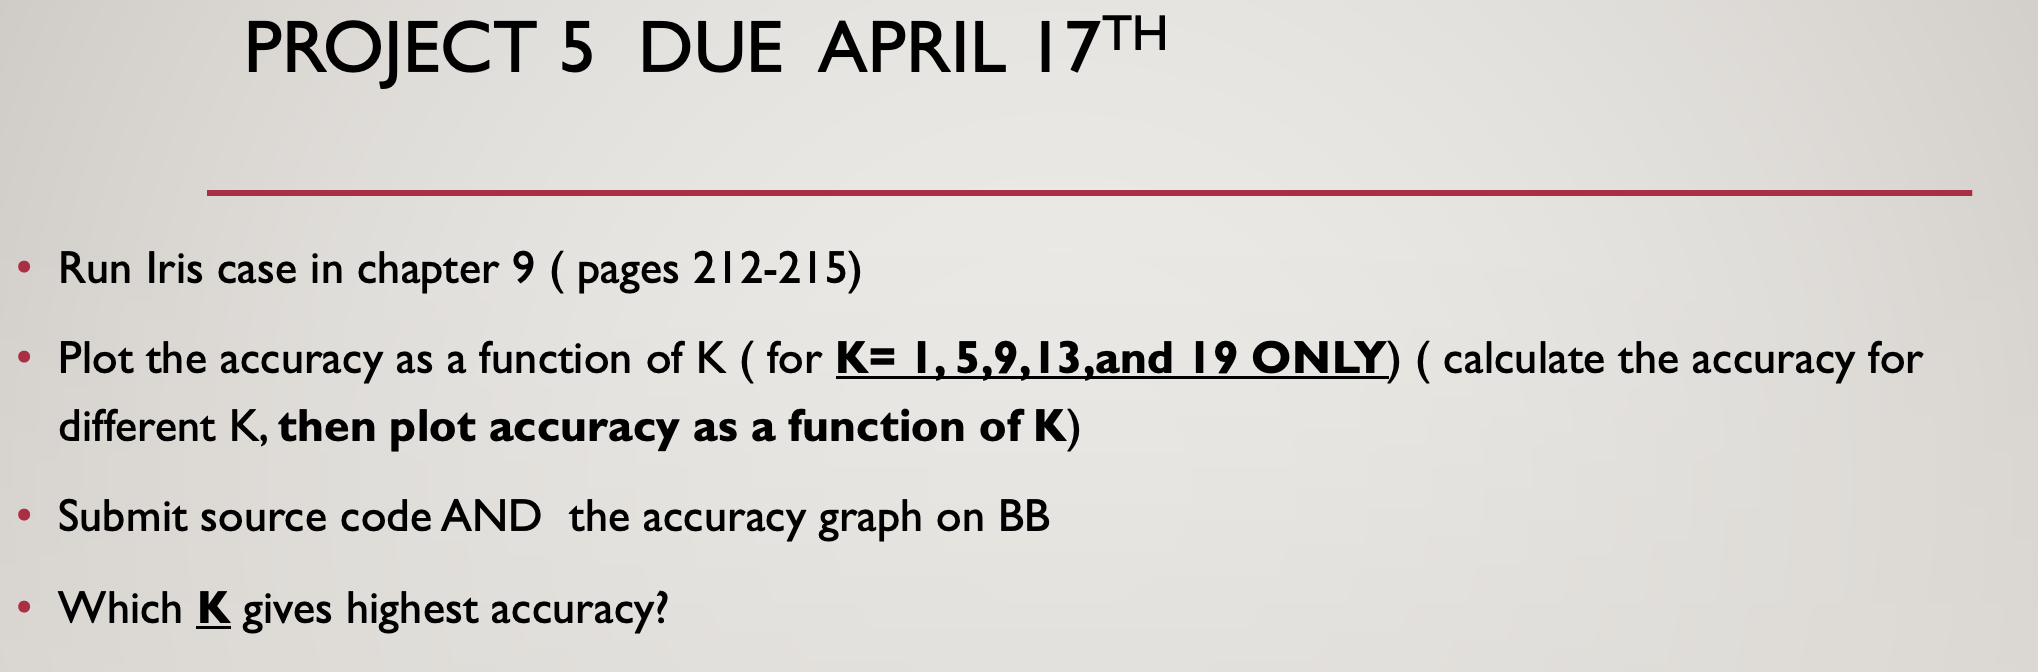

* Run Iris case in chapter 9 ( pages 212-215) 
* Plot the accuracy as a function of K ( for K= 1, 5,9,13,and 19 ONLY) ( calculate the accuracy for different K, then plot accuracy as a function of K)
* Submit:
    * source code AND 
    * the accuracy graph on BB

* Which K gives highest accuracy?


### K=1

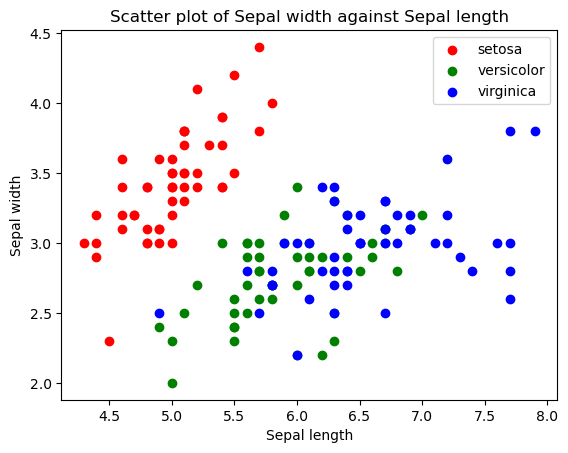

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
from sklearn import svm, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = iris.data[:, :2] # take the first two features
y = iris.target

#---plot the points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal length')
plt.show()

(array([0, 1, 2]), array([50, 56, 44]))


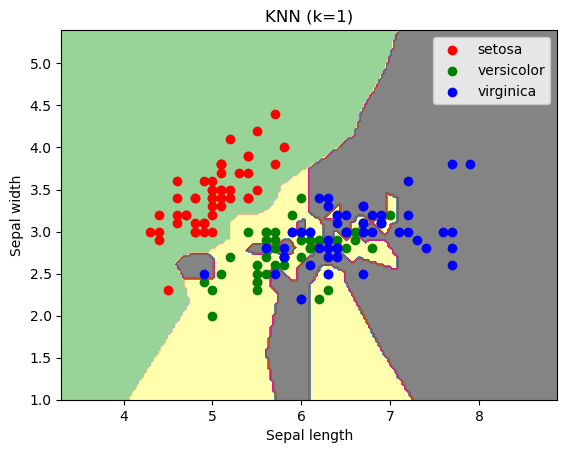

In [21]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
#---instantiate learning model---
knn = KNeighborsClassifier(n_neighbors=k)
#---fitting the model---
knn.fit(X, y)
#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#---step size in the mesh---
h = (x_max / x_min)/100
#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)
#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title(f'KNN (k={k})')
plt.legend(loc='best', shadow=False, scatterpoints=1)
predictions = knn.predict(X)
#--classifications based on predictions---
print(np.unique(predictions, return_counts=True))